# **1. Perkenalan Dataset**


- **Nama:** Althaf Yudhistira
- **Email:** althafbanfsaj@gmail.com
- **ID Dicoding:** althafby

1. **Sumber Dataset**:  
   [Dota 2 Review](https://steamcommunity.com/app/570/reviews/?browsefilter=trendyear&snr=1_5_100010_&p=1)
   

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from scipy.ndimage import gaussian_filter1d 

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [72]:
df = pd.read_csv('D:/project_ml_dicoding/clustering.csv')
df.head()


,steam_id,review_id,review_text,voted_up,playtime_recorded,playtime_last_2W,timestamp_created,early_access,votes_helpful,votes_funny,comments_count_in_review
0,76561198098004036,186538371,shits asss,False,776,329,1737991109,False,0,0,0
1,76561199255948101,186537945,меня выебали,True,6073,661,1737990736,False,1,0,0
2,76561199218503014,186537320,"Shit, just shit, boring, hard to control and u...",False,19,19,1737990120,False,0,0,0
3,76561199434595605,186536729,it's good,True,35852,1670,1737989573,False,0,0,0
4,76561199663625554,186536706,good game,True,186,186,1737989549,False,0,0,0


In [73]:
t=df['early_access']==False
sum(t)

3000

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   steam_id                  3000 non-null   int64 
 1   review_id                 3000 non-null   int64 
 2   review_text               2992 non-null   object
 3   voted_up                  3000 non-null   bool  
 4   playtime_recorded         3000 non-null   int64 
 5   playtime_last_2W          3000 non-null   int64 
 6   timestamp_created         3000 non-null   int64 
 7   early_access              3000 non-null   bool  
 8   votes_helpful             3000 non-null   int64 
 9   votes_funny               3000 non-null   int64 
 10  comments_count_in_review  3000 non-null   int64 
dtypes: bool(2), int64(8), object(1)
memory usage: 216.9+ KB


2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

In [75]:
df.duplicated().sum()

0

In [76]:
df.isna().sum()

steam_id                    0
review_id                   0
review_text                 8
voted_up                    0
playtime_recorded           0
playtime_last_2W            0
timestamp_created           0
early_access                0
votes_helpful               0
votes_funny                 0
comments_count_in_review    0
dtype: int64

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

In [77]:
df.describe()

,steam_id,review_id,playtime_recorded,playtime_last_2W,timestamp_created,votes_helpful,votes_funny,comments_count_in_review
count,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,7.656120e+16,1.847417e+08,1.021156e+05,1398.150333,1.736234e+09,0.350667,0.136667,0.055333
std,6.019253e+08,2.013126e+06,1.684390e+05,2168.835496,1.802206e+06,4.904119,1.976350,0.748192
min,7.656120e+16,1.797537e+08,5.000000e+00,0.000000,1.732485e+09,0.000000,0.000000,0.000000
25%,7.656120e+16,1.832654e+08,3.692000e+03,9.000000,1.734771e+09,0.000000,0.000000,0.000000
50%,7.656120e+16,1.858970e+08,2.184000e+04,594.000000,1.737241e+09,0.000000,0.000000,0.000000
75%,7.656120e+16,1.862419e+08,1.388558e+05,1874.250000,1.737659e+09,0.000000,0.000000,0.000000
max,7.656120e+16,1.865384e+08,1.950354e+06,20123.000000,1.737991e+09,209.000000,71.000000,36.000000


In [78]:
df.groupby(by="voted_up").agg({
    "playtime_recorded": ["mean","max","min","sum"],
    "playtime_last_2W": ["mean","max","min","sum"],
    "votes_helpful": ["max","min","sum"],
    "comments_count_in_review": ["max","min","sum"],
})

playtime_recorded                         playtime_last_2W         \
                      mean      max min        sum             mean    max   
voted_up                                                                     
False        149697.153333  1950354   5  224545730      1266.524000  20123   
True          54533.980000  1068432   6   81800970      1529.776667  20044   

                      votes_helpful          comments_count_in_review           
         min      sum           max min  sum                      max min  sum  
voted_up                                                                        
False      0  1899786           209   0  933                       36   0  153  
True       0  2294665            32   0  119                        3   0   13

In [79]:
corr_df=df[['voted_up','playtime_recorded','playtime_last_2W','votes_helpful','comments_count_in_review','votes_funny']]
corr_df.corr()

,voted_up,playtime_recorded,playtime_last_2W,votes_helpful,comments_count_in_review,votes_funny
voted_up,1.000000,-0.282533,0.060700,-0.055337,-0.062383,-0.038124
playtime_recorded,-0.282533,1.000000,0.242324,0.106908,0.089487,0.100091
playtime_last_2W,0.060700,0.242324,1.000000,0.013874,-0.003860,0.017457
votes_helpful,-0.055337,0.106908,0.013874,1.000000,0.757887,0.844365
comments_count_in_review,-0.062383,0.089487,-0.003860,0.757887,1.000000,0.637108
votes_funny,-0.038124,0.100091,0.017457,0.844365,0.637108,1.000000


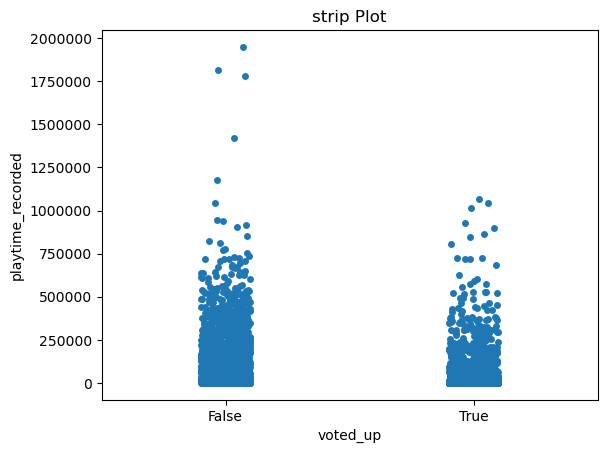

In [80]:
sns.stripplot(data=df, x='voted_up', y='playtime_recorded',jitter=True)
plt.title('strip Plot')
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

array([[<Axes: title={'center': 'steam_id'}>,
        <Axes: title={'center': 'review_id'}>,
        <Axes: title={'center': 'playtime_recorded'}>],
       [<Axes: title={'center': 'playtime_last_2W'}>,
        <Axes: title={'center': 'timestamp_created'}>,
        <Axes: title={'center': 'votes_helpful'}>],
       [<Axes: title={'center': 'votes_funny'}>,
        <Axes: title={'center': 'comments_count_in_review'}>, <Axes: >]],
      dtype=object)

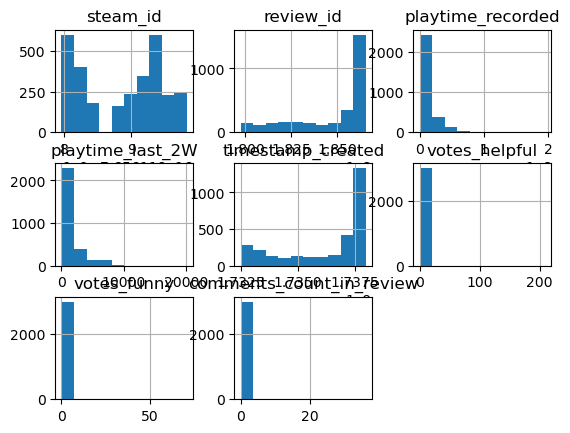

In [81]:
df.hist()

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

C:\Users\Emesi\AppData\Local\Temp\ipykernel_8608\2189158463.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['playtime_recorded'], label=category, shade=True)
C:\Users\Emesi\AppData\Local\Temp\ipykernel_8608\2189158463.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['playtime_recorded'], label=category, shade=True)


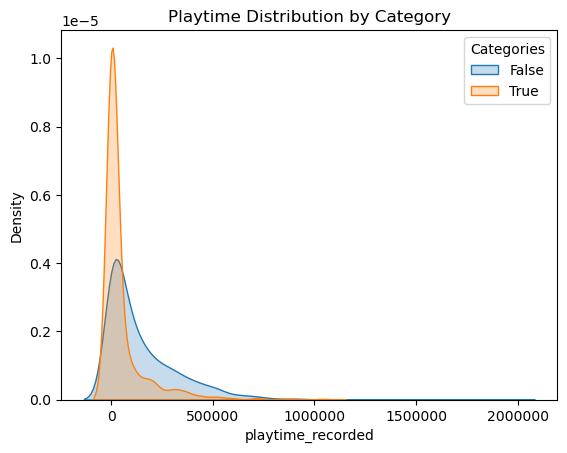

In [82]:
for category in df['voted_up'].unique():
    subset = df[df['voted_up'] == category]
    sns.kdeplot(subset['playtime_recorded'], label=category, shade=True)

plt.title("Playtime Distribution by Category")
plt.legend(title="Categories")
f=plt.gca()
f.xaxis.get_major_formatter().set_scientific(False)
plt.show()

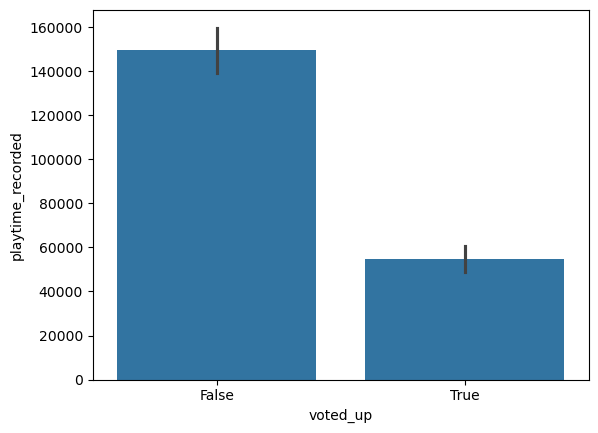

In [83]:
sns.barplot(data=df,x=df['voted_up'],y=df['playtime_recorded'])
plt.show()

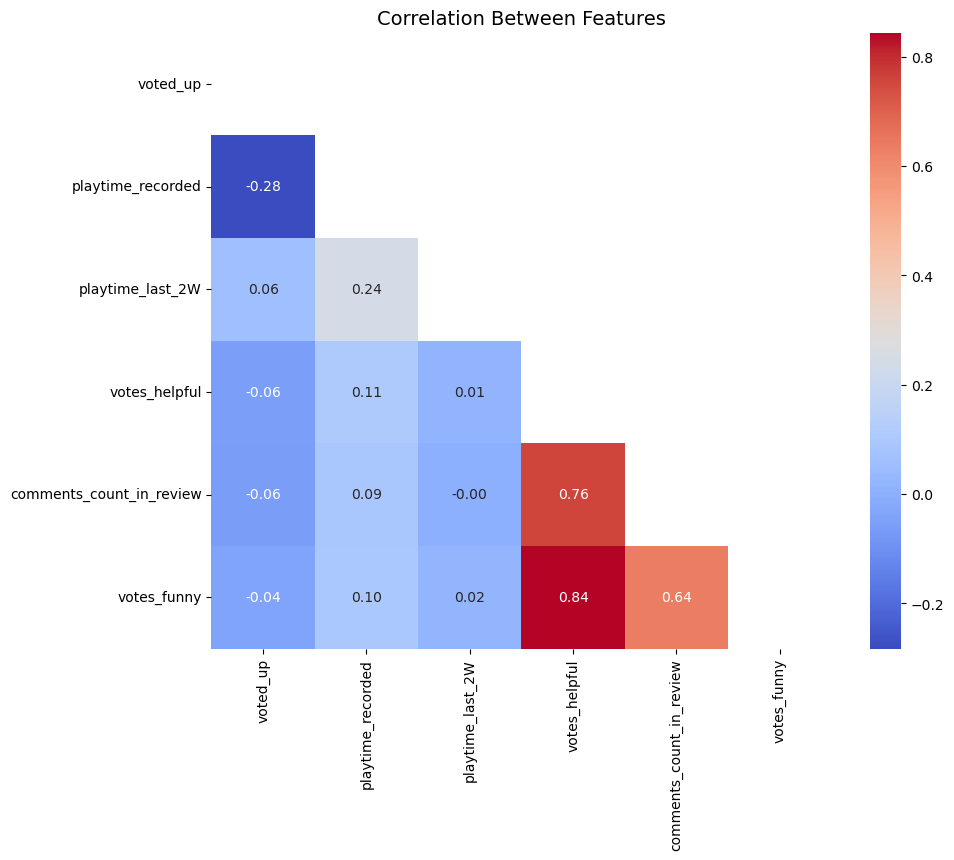

In [84]:
corr_df=df[['voted_up','playtime_recorded','playtime_last_2W','votes_helpful','comments_count_in_review','votes_funny']]
fig, ax = plt.subplots(figsize=(10,8))
correlation_matrix = corr_df.corr()
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',fmt=".2f", mask =np.triu(np.ones_like(correlation_matrix, dtype=bool)))
plt.title("Correlation Between Features", fontsize= 14)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.


### Menghapus atau Menangani Data Kosong (Missing Values)


In [85]:
unrelatedcol=[0,1,2,6,7]
df=df.drop(df.columns[unrelatedcol],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   voted_up                  3000 non-null   bool 
 1   playtime_recorded         3000 non-null   int64
 2   playtime_last_2W          3000 non-null   int64
 3   votes_helpful             3000 non-null   int64
 4   votes_funny               3000 non-null   int64
 5   comments_count_in_review  3000 non-null   int64
dtypes: bool(1), int64(5)
memory usage: 120.2 KB


### Normalisasi atau Standarisasi Fitur

In [86]:
normalized = ["playtime_recorded", "playtime_last_2W", "votes_helpful", "votes_funny", "comments_count_in_review"]
df[normalized] = np.log1p(df[normalized])
scaler = MinMaxScaler()
df[normalized] = scaler.fit_transform(df[normalized])
print("Scaled data stats:\n",
      "Min:", np.min(df[normalized], axis=0), "\n",
      "Median:", np.median(df[normalized], axis=0), "\n",
      "Max:", np.max(df[normalized], axis=0))


Scaled data stats:
 Min: playtime_recorded           0.0
playtime_last_2W            0.0
votes_helpful               0.0
votes_funny                 0.0
comments_count_in_review    0.0
dtype: float64 
 Median: [0.64607098 0.64467963 0.         0.         0.        ] 
 Max: playtime_recorded           1.0
playtime_last_2W            1.0
votes_helpful               1.0
votes_funny                 1.0
comments_count_in_review    1.0
dtype: float64


### Encoding Data Kategorikal


In [87]:
df["voted_up"] = df["voted_up"].astype(int)
df.head()

,voted_up,playtime_recorded,playtime_last_2W,votes_helpful,votes_funny,comments_count_in_review
0,0,0.383216,0.585195,0.00000,0.0,0.0
1,1,0.545237,0.655447,0.12963,0.0,0.0
2,0,0.094863,0.302304,0.00000,0.0,0.0
3,1,0.685123,0.748883,0.00000,0.0,0.0
4,1,0.270991,0.527879,0.00000,0.0,0.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [88]:

db = DBSCAN(eps=0.43, min_samples=12)
db.fit(df)


labels = db.labels_


n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
if len(set(labels)) > 1:
    score = silhouette_score(df, labels)
    print(f"Silhouette Score: {score}")
else:
    print("Not enough clusters to compute Silhouette Score.")
    
print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

Silhouette Score: 0.5866441934542568
Estimated number of clusters: 2
Estimated number of noise points: 6


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

### **Elbow Method untuk Menentukan Nilai Eps dan nilai sampel minimum untuk DBSCAN**

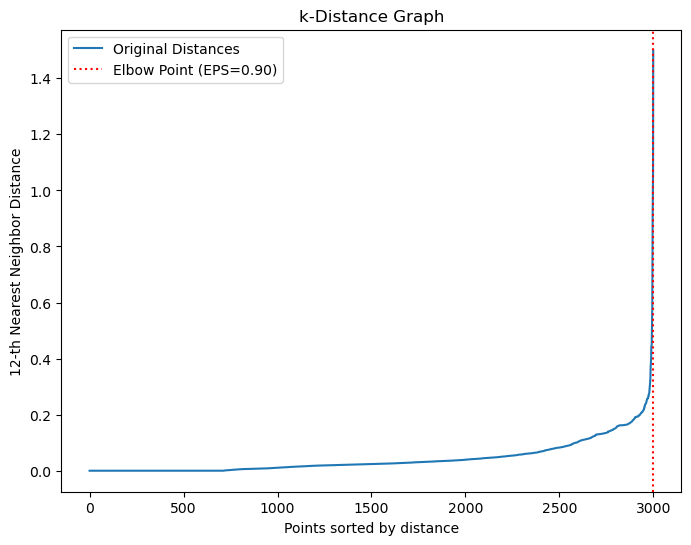

Suggested EPS value: 0.90


In [89]:

min_samples = len(df.columns) * 2
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

distances = np.sort(distances[:, min_samples-1], axis=0)
smoothed_distances = gaussian_filter1d(distances, sigma=2)
derivative = np.gradient(smoothed_distances)
elbow_point = np.argmax(derivative)

plt.figure(figsize=(8, 6))
plt.plot(distances, label='Original Distances')
plt.axvline(x=elbow_point, color='r', linestyle=':', label=f'Elbow Point (EPS={distances[elbow_point]:.2f})')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.title('k-Distance Graph')
plt.legend()
plt.show()

print(f"Suggested EPS value: {distances[elbow_point]:.2f}")

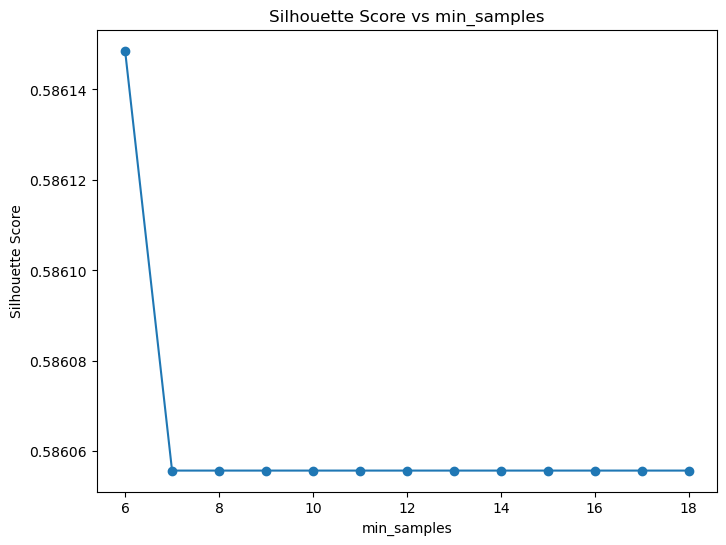

In [90]:

eps = 0.9  
min_samples_values = range(6,19)
silhouette_scores = []

for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df)
    if len(np.unique(labels)) > 1:  
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  

plt.figure(figsize=(8, 6))
plt.plot(min_samples_values, silhouette_scores, marker='o')
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs min_samples')
plt.show()

In [91]:

db = DBSCAN(eps=0.9, min_samples=12)
db.fit(df)


labels = db.labels_


n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
if len(set(labels)) > 1:
    score = silhouette_score(df, labels)
    print(f"Silhouette Score: {score}")
else:
    print("Not enough clusters to compute Silhouette Score.")
    
print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

Silhouette Score: 0.5860557180320325
Estimated number of clusters: 2
Estimated number of noise points: 1


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [92]:

df["has_engagement"] = (
    (df["votes_helpful"] > 0) | 
    (df["votes_funny"] > 0) | 
    (df["comments_count_in_review"] > 0)
).astype(int)
df = df.drop(columns=["votes_helpful", "votes_funny", "comments_count_in_review"])

In [93]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  
df_pca = pca.fit_transform(df)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   voted_up           3000 non-null   int32  
 1   playtime_recorded  3000 non-null   float64
 2   playtime_last_2W   3000 non-null   float64
 3   has_engagement     3000 non-null   int32  
dtypes: float64(2), int32(2)
memory usage: 70.4 KB


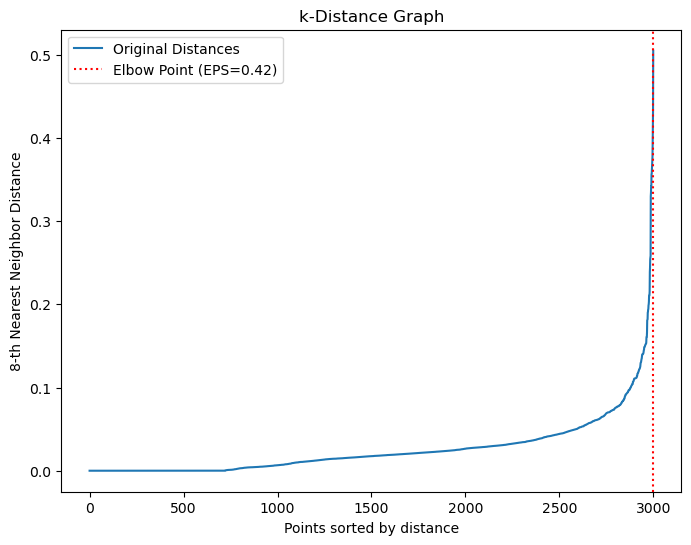

Suggested EPS value: 0.42


In [95]:
min_samples = len(df.columns) * 2
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)
distances = np.sort(distances[:, min_samples-1], axis=0)
smoothed_distances = gaussian_filter1d(distances, sigma=2)
derivative = np.gradient(smoothed_distances)
elbow_point = np.argmax(derivative)

plt.figure(figsize=(8, 6))
plt.plot(distances, label='Original Distances')
plt.axvline(x=elbow_point, color='r', linestyle=':', label=f'Elbow Point (EPS={distances[elbow_point]:.2f})')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.title('k-Distance Graph')
plt.legend()
plt.show()

print(f"Suggested EPS value: {distances[elbow_point]:.2f}")

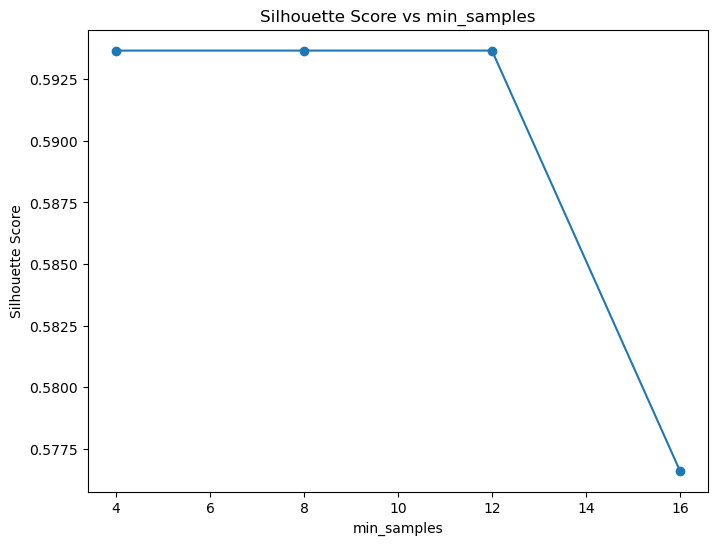

In [96]:
eps = 0.42 
min_samples_values = [4, 8, 12, 16]
silhouette_scores = []

for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df)
    if len(np.unique(labels)) > 1: 
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  

plt.figure(figsize=(8, 6))
plt.plot(min_samples_values, silhouette_scores, marker='o')
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs min_samples')
plt.show()

In [97]:

db = DBSCAN(eps=0.42, min_samples=8)
db.fit(df)


labels = db.labels_


n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
if len(set(labels)) > 1:
    score = silhouette_score(df, labels)
    print(f"Silhouette Score: {score}")
else:
    print("Not enough clusters to compute Silhouette Score.")
    
print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")


Silhouette Score: 0.5936541974142387
Estimated number of clusters: 4
Estimated number of noise points: 0


df.info()

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

C:\Users\Emesi\AppData\Local\Temp\ipykernel_8608\3780228899.py:9: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels,style=labels, palette=sns.color_palette("Paired"),markers=True,legend=True)


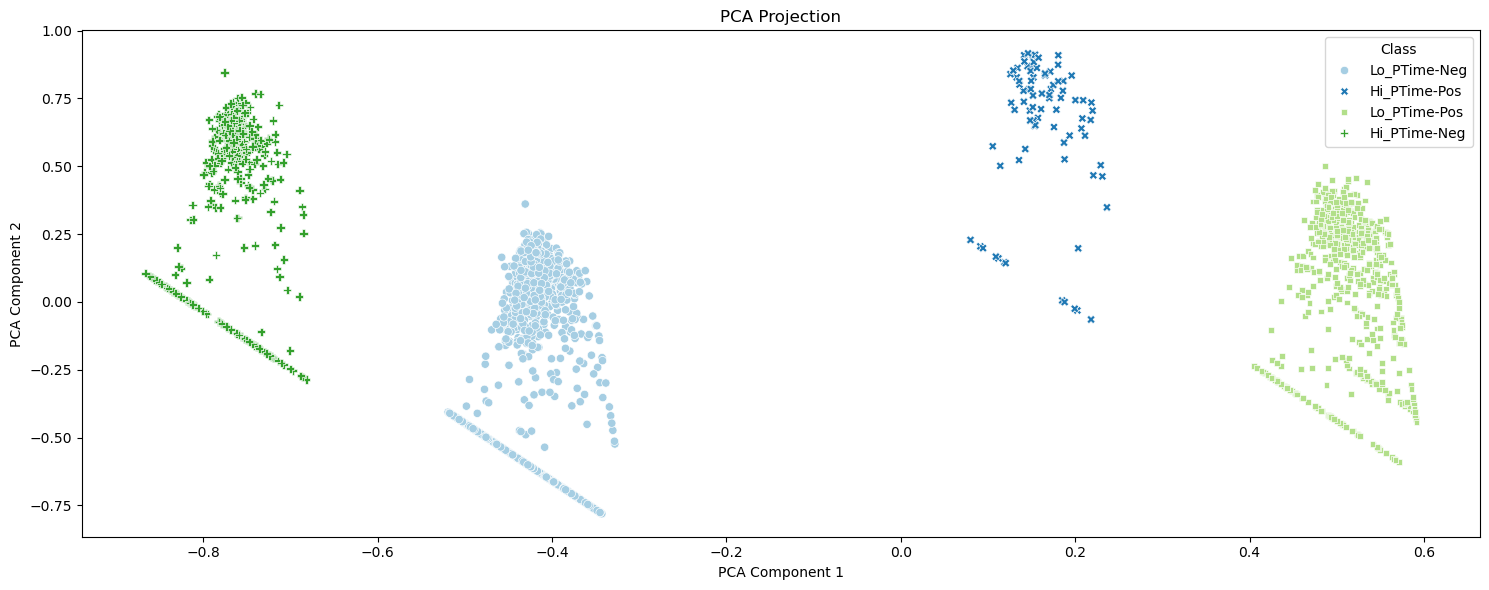

In [98]:
X = df.values  
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(15, 6))


sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels,style=labels, palette=sns.color_palette("Paired"),markers=True,legend=True)
plt.title('PCA Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

legend=plt.legend()
class_names = ['Lo_PTime-Neg', 'Hi_PTime-Pos','Lo_PTime-Pos','Hi_PTime-Neg']  
for text, class_name in zip(legend.get_texts(), class_names):
    text.set_text(class_name)
legend.set_title('Class')
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [99]:

indices = [0, 1]  

subset_min = scaler.min_[indices]
subset_scale = scaler.scale_[indices]

df[["playtime_recorded", "playtime_last_2W"]] = (
    df[["playtime_recorded", "playtime_last_2W"]] - subset_min
) / subset_scale


df[["playtime_recorded", "playtime_last_2W"]] = np.expm1(df[["playtime_recorded", "playtime_last_2W"]])

In [100]:

df['cluster'] = labels 
df_clean = df[df['cluster'] != -1]

cluster_stats = df_clean.groupby('cluster').agg({
  
    'voted_up': ['mean', ],  
    'has_engagement': ['mean',],
    'playtime_recorded': ['median'],
    'playtime_last_2W': ['median'],
    'cluster': 'size'
})
print(cluster_stats)

        voted_up has_engagement playtime_recorded playtime_last_2W cluster
            mean           mean            median           median    size
cluster                                                                   
0            0.0            0.0           69244.0            249.0    1107
1            1.0            1.0           60643.0           1309.0      83
2            1.0            0.0            3708.0            594.0    1417
3            0.0            1.0          129471.0            703.0     393


**1. Cluster 0:**
- Tipe Rekomendasi :  Tidak Merekomendasikan
- Ada Interaksi dari User lain Dalam Ulasan : Tidak
- Median Riwayat lama bermain (jam) : 69244.0
- Median Lama bermain selama 2 minggu belakangan(jam) :  249.0
- Analisis : Cluster ini Berisikan Pemain yang mereview Negatif, dengan riwayat lama bermain pada golongan menengah dan intensitas bermain pemain di golongan ini cenderung Rendah daripada cluster lain.

**2. Cluster 1:**
- Tipe Rekomendasi : Merekomendasikan
- Ada Interaksi dari User lain Dalam Ulasan : Ya
- Median Riwayat lama bermain (jam) : 60643.0
- Median Lama bermain selama 2 minggu belakangan(jam) :  1309.0
- Analisis : Cluster ini Berisikan Pemain yang mereview Positif, dan juga review pemain tersebut cenderung menarik perhatian reviewer lain, dengan riwayat lama bermain pada golongan menengah dan intensitas bermain pemain di golongan ini cenderung tinggi.

**3. Cluster 2:**
- Tipe Rekomendasi : Merekomendasikan
- Ada Interaksi dari User lain Dalam Ulasan : Tidak
- Median Riwayat lama bermain (jam) : 3708.0
- Median Lama bermain selama 2 minggu belakangan(jam) :  594.0
- Analisis : Cluster ini Berisikan Pemain yang mereview Positif, dengan riwayat lama bermain pada golongan Rendah dan intensitas bermain pemain di golongan ini cenderung di golongan menengah.
    
**4. Cluster 4:**
- Tipe Rekomendasi : Tidak Merekomendasikan
- Ada Interaksi dari User lain Dalam Ulasan : Ya
- Median Riwayat lama bermain (jam) : 129471.0 
- Median Lama bermain selama 2 minggu belakangan(jam) :  703.0
- Analisis : Cluster ini Berisikan Pemain yang mereview Neagatif, dan juga review pemain tersebut cenderung menarik perhatian reviewer lain, dengan riwayat lama bermain pada golongan menengah dan intensitas bermain pemain di golongan ini cenderung menegah.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_clean.to_csv('classify.csv', index=False)

NameError: name 'df_cleafn' is not defined